In [7]:
!pip install yahoofinancials

In [ ]:
!pip install zipline

In [15]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yahoofinancials as yfinance 
#import zipline
import pandas as pd
#import talib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
#from pandas_datareader import data
import csv
#import quandl

%matplotlib inline

In [16]:
%load_ext zipline

ModuleNotFoundError: No module named 'zipline'

In [19]:
##Importing data

bitcoin=pd.read_csv('large-cap crypto dataset/BTC-USD.csv', index_col="Date")
binance=pd.read_csv('large-cap crypto dataset/BNB-USD.csv', index_col="Date")
ethereum=pd.read_csv('large-cap crypto dataset/ETH-USD.csv', index_col="Date")
usd_coin=pd.read_csv('large-cap crypto dataset/USDC-USD.csv', index_col="Date")
tether=pd.read_csv('large-cap crypto dataset/USDT-USD.csv', index_col="Date")




In [20]:
print(bitcoin.tail())
print(binance.tail())
print(ethereum.tail())
print(usd_coin.tail())
print(tether.tail())

                    Open          High           Low         Close  \
Date                                                                 
2022-04-24  39478.375000  39845.925781  39233.539063  39469.292969   
2022-04-25  39472.605469  40491.753906  38338.378906  40458.308594   
2022-04-26  40448.421875  40713.890625  37884.984375  38117.460938   
2022-04-27  38120.300781  39397.917969  37997.312500  39241.121094   
2022-04-28           NaN           NaN           NaN           NaN   

               Adj Close        Volume  
Date                                    
2022-04-24  39469.292969  1.796440e+10  
2022-04-25  40458.308594  3.544573e+10  
2022-04-26  38117.460938  3.456909e+10  
2022-04-27  39241.121094  3.098102e+10  
2022-04-28           NaN           NaN  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-24  401.525024  405.430573  398.346619  399.105377  399.105377   


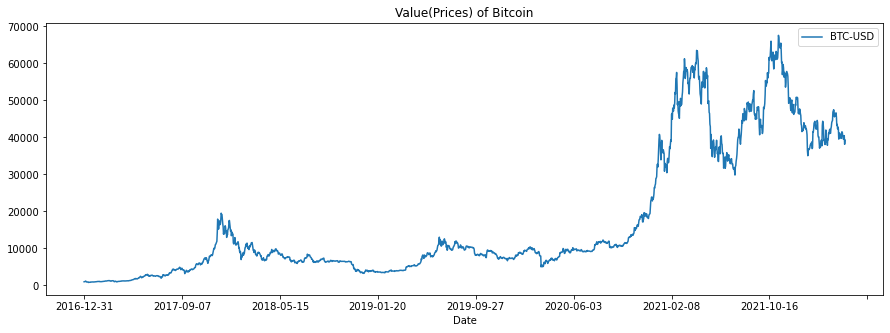

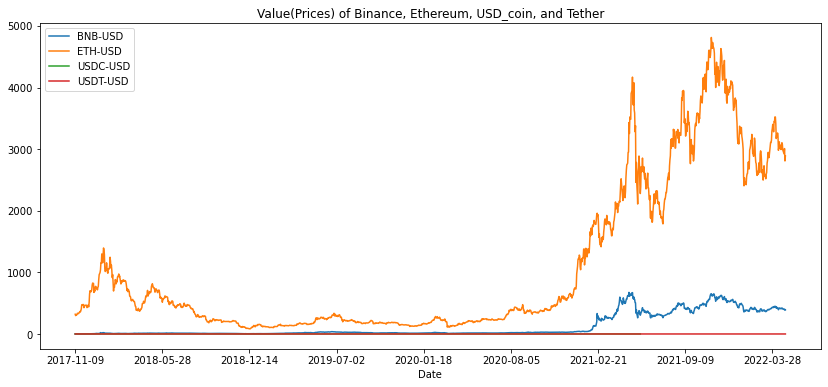

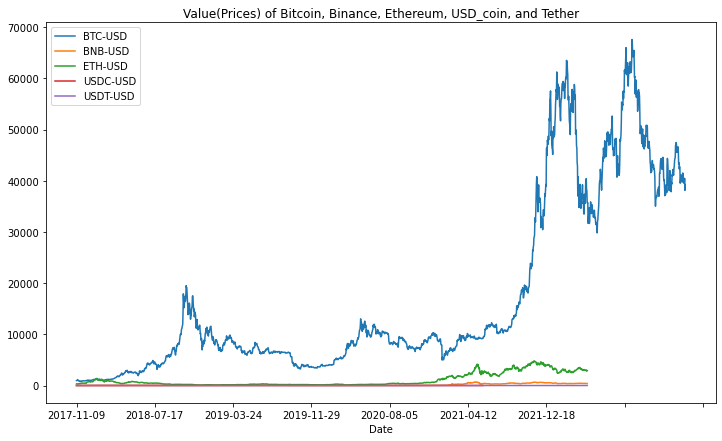

In [21]:

#Bicoin only
bitcoin['Close'].plot(label="BTC-USD",figsize=(15,5))
plt.title('Value(Prices) of Bitcoin')
plt.legend()
plt.show()

#other four large cap cryptos
binance['Close'].plot(label="BNB-USD", figsize=(14, 6))
ethereum['Close'].plot(label="ETH-USD")
usd_coin['Close'].plot(label="USDC-USD")
tether['Close'].plot(label="USDT-USD")
plt.title('Value(Prices) of Binance, Ethereum, USD_coin, and Tether')
plt.legend()
plt.show()
          
          
  #Combined 
Startdate = '2018-12-30'
Enddate = '2022-04-26'
underDaterange = []
bitcoin['Close'].plot(label="BTC-USD",figsize=(12,7))
binance['Close'].plot(label="BNB-USD")
ethereum['Close'].plot(label="ETH-USD")
usd_coin['Close'].plot(label="USDC-USD")
tether['Close'].plot(label="USDT-USD")

plt.title('Value(Prices) of Bitcoin, Binance, Ethereum, USD_coin, and Tether')
plt.legend()
plt.show()

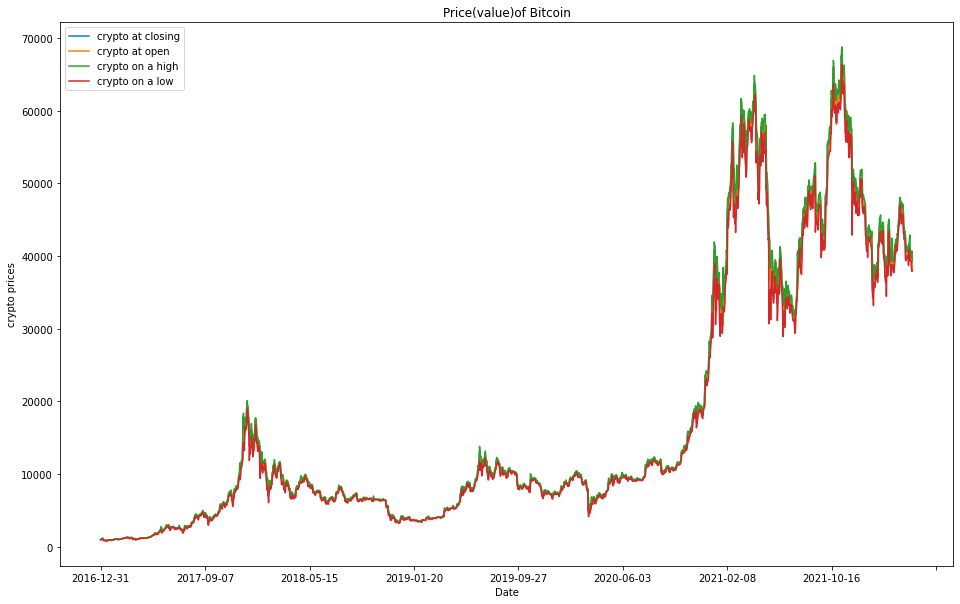

In [22]:
bitcoin['Close'].plot(label="crypto at closing", figsize=(16,10))
bitcoin['Open'].plot(label="crypto at open")
bitcoin['High'].plot(label="crypto on a high")
bitcoin['Low'].plot(label="crypto on a low")
plt.title('Price(value)of Bitcoin')
plt.legend()
plt.ylabel("crypto prices")
plt.show()

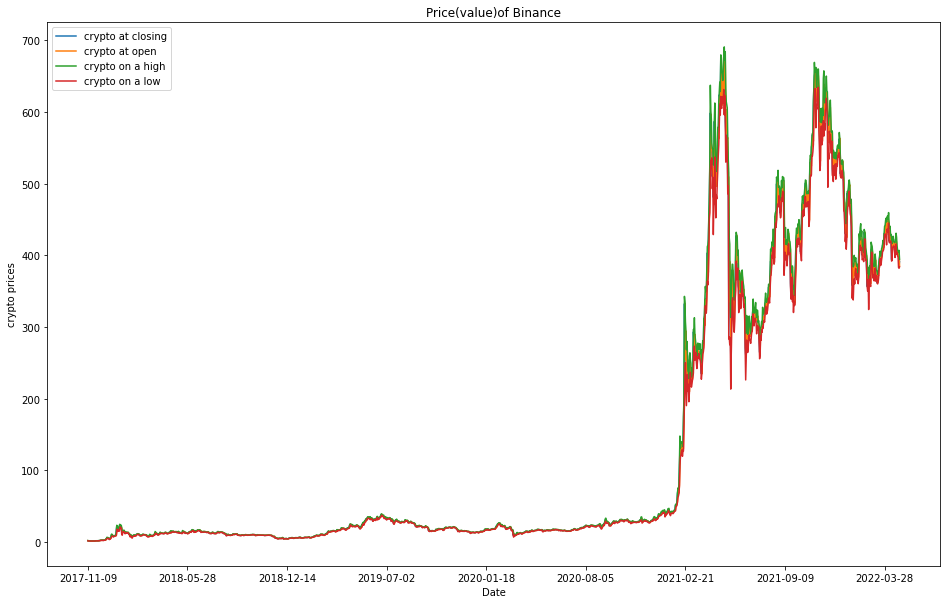

In [23]:
binance['Close'].plot(label="crypto at closing", figsize=(16,10))
binance['Open'].plot(label="crypto at open")
binance['High'].plot(label="crypto on a high")
binance['Low'].plot(label="crypto on a low")
plt.title('Price(value)of Binance')
plt.legend()
plt.ylabel("crypto prices")
plt.show()

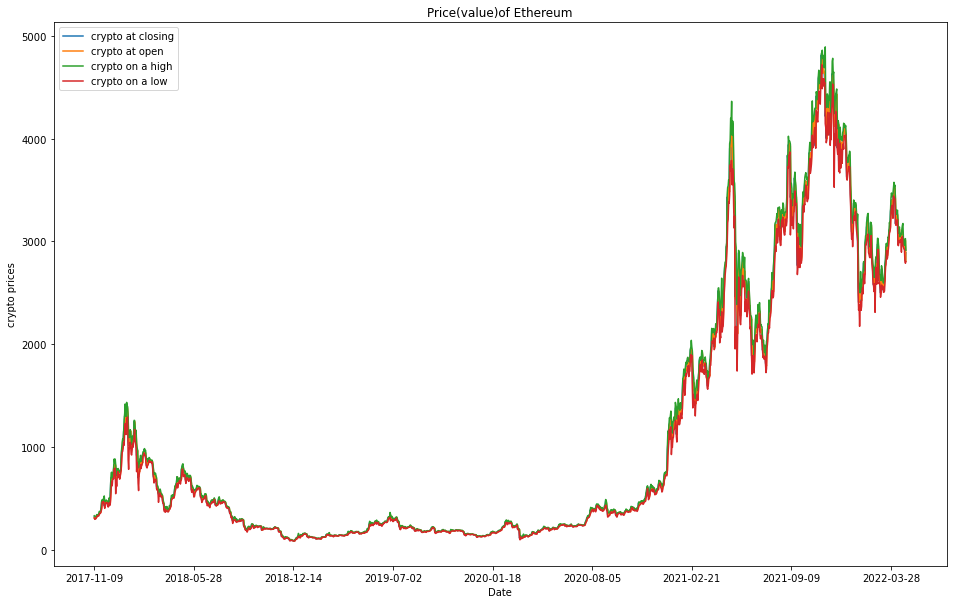

In [24]:
ethereum['Close'].plot(label="crypto at closing", figsize=(16,10))
ethereum['Open'].plot(label="crypto at open")
ethereum['High'].plot(label="crypto on a high")
ethereum['Low'].plot(label="crypto on a low")
plt.title('Price(value)of Ethereum')
plt.legend()
plt.ylabel("crypto prices")
plt.show()

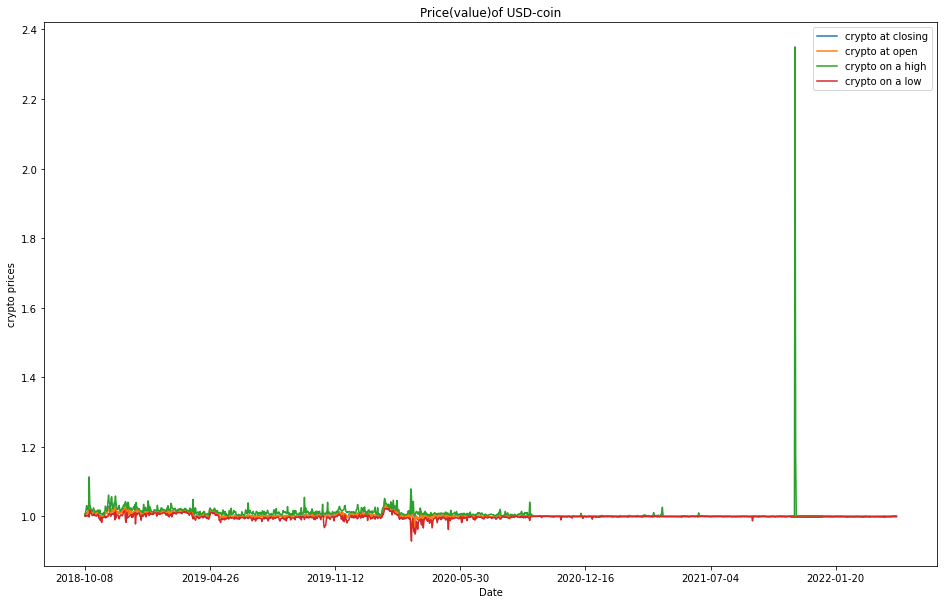

In [25]:
usd_coin['Close'].plot(label="crypto at closing", figsize=(16,10))
usd_coin['Open'].plot(label="crypto at open")
usd_coin['High'].plot(label="crypto on a high")
usd_coin['Low'].plot(label="crypto on a low")
plt.title('Price(value)of USD-coin')
plt.legend()
plt.ylabel("crypto prices")
plt.show()

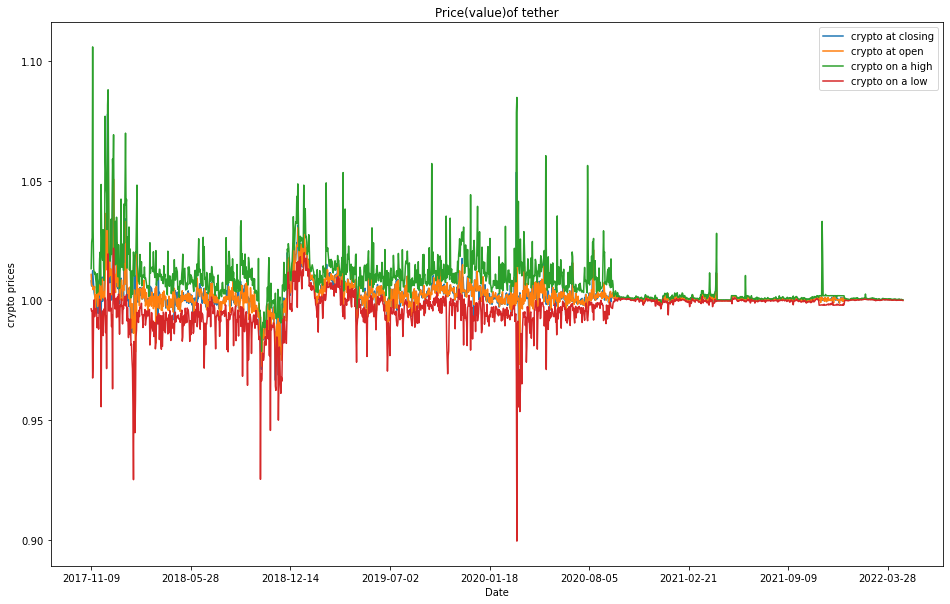

In [26]:
tether['Close'].plot(label="crypto at closing", figsize=(16,10))
tether['Open'].plot(label="crypto at open")
tether['High'].plot(label="crypto on a high")
tether['Low'].plot(label="crypto on a low")
plt.title('Price(value)of tether')
plt.legend()
plt.ylabel("crypto prices")
plt.show()

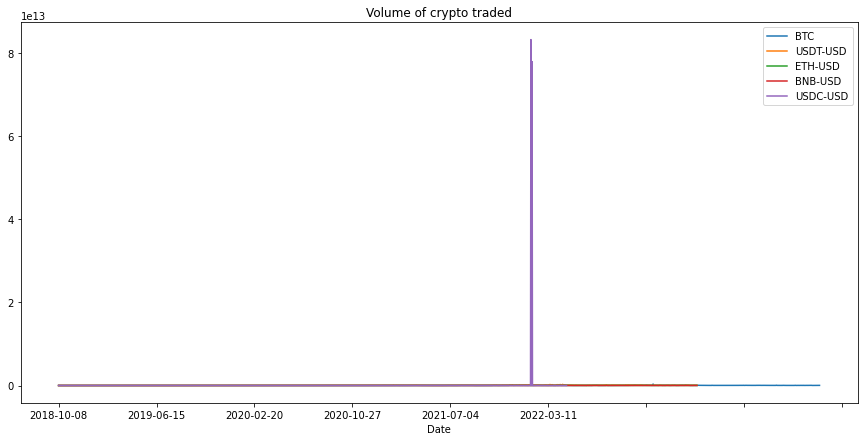

In [27]:
bitcoin['Volume'].plot(label = 'BTC', figsize = (15,7))
tether['Volume'].plot(label = "USDT-USD")
ethereum['Volume'].plot(label = "ETH-USD")
binance['Volume'].plot(label = "BNB-USD")
usd_coin['Volume'].plot(label = "USDC-USD")
plt.title('Volume of crypto traded')
plt.legend()

In [29]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install yfinance

  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
  Using cached multitasking-0.0.10-py3-none-any.whl
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\requests-2.25.1.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [33]:
import pandas_datareader as pdr
import datetime
from pandas_datareader import data
import pandas as pd
#import yfinance as yf
from yahoofinancials import YahooFinancials

In [34]:
start=datetime.datetime(2017,4,15)

end=datetime.datetime(2022,4,28)
ticker=['BTC-USD','BNB-USD','ETH-USD','USDC-USD', 'USDT-USD']
datas=data.DataReader(ticker, 'yahoo',start, end)

datas.head()


Attributes    Adj Close                                          Close  \
Symbols         BTC-USD BNB-USD ETH-USD USDC-USD USDT-USD      BTC-USD   
Date                                                                     
2017-04-15  1172.520020     NaN     NaN      NaN      NaN  1172.520020   
2017-04-16  1182.939941     NaN     NaN      NaN      NaN  1182.939941   
2017-04-17  1193.910034     NaN     NaN      NaN      NaN  1193.910034   
2017-04-18  1211.670044     NaN     NaN      NaN      NaN  1211.670044   
2017-04-19  1210.290039     NaN     NaN      NaN      NaN  1210.290039   

Attributes                                    ...         Open          \
Symbols    BNB-USD ETH-USD USDC-USD USDT-USD  ...      BTC-USD BNB-USD   
Date                                          ...                        
2017-04-15     NaN     NaN      NaN      NaN  ...  1167.300049     NaN   
2017-04-16     NaN     NaN      NaN      NaN  ...  1172.609985     NaN   
2017-04-17     NaN     NaN      NaN      NaN  ...  1183.250000     NaN   
2017-04-18     NaN     NaN      NaN      NaN  ...  1193.770020     NaN   
2017-04-19     NaN     NaN      NaN      NaN  ...  1212.130005     NaN   

Attributes                                 Volume                           \
Symbols    ETH-USD USDC-USD USDT-USD      BTC-USD BNB-USD ETH-USD USDC-USD   
Date                                                                         
2017-04-15     NaN      NaN      NaN  203559008.0     NaN     NaN      NaN   
2017-04-16     NaN      NaN      NaN  183231008.0     NaN     NaN      NaN   
2017-04-17     NaN      NaN      NaN  253206000.0     NaN     NaN      NaN   
2017-04-18     NaN      NaN      NaN  270524000.0     NaN     NaN      NaN   
2017-04-19     NaN      NaN      NaN  288060992.0     NaN     NaN      NaN   

Attributes           
Symbols    USDT-USD  
Date                 
2017-04-15      NaN  
2017-04-16      NaN  
2017-04-17      NaN  
2017-04-18      NaN  
2017-04-19      NaN  

[5 rows x 30 columns]

In [35]:

stocks = ["BTC-USD","BNB-USD","ETH-USD","USDC-USD", "USDT-USD"]
start = datetime.datetime(2017,4,15)
end = datetime.datetime(2022,4,28)

datas_crypto= pdr.DataReader(stocks, 'yahoo',start,end)
datas_crypto.tail()



Attributes     Adj Close                                               \
Symbols          BTC-USD     BNB-USD      ETH-USD  USDC-USD  USDT-USD   
Date                                                                    
2022-04-25  40458.308594  404.350281  3009.393555  1.000218  1.000145   
2022-04-26  38117.460938  385.483063  2808.298340  1.000127  1.000073   
2022-04-27  39241.121094  391.445831  2888.929688  1.000321  1.000153   
2022-04-28  39773.828125  406.718201  2936.940918  1.000029  1.000191   
2022-04-29  38609.824219  393.062164  2815.601807  1.000023  1.000020   

Attributes         Close                                               ...  \
Symbols          BTC-USD     BNB-USD      ETH-USD  USDC-USD  USDT-USD  ...   
Date                                                                   ...   
2022-04-25  40458.308594  404.350281  3009.393555  1.000218  1.000145  ...   
2022-04-26  38117.460938  385.483063  2808.298340  1.000127  1.000073  ...   
2022-04-27  39241.121094  391.445831  2888.929688  1.000321  1.000153  ...   
2022-04-28  39773.828125  406.718201  2936.940918  1.000029  1.000191  ...   
2022-04-29  38609.824219  393.062164  2815.601807  1.000023  1.000020  ...   

Attributes          Open                                               \
Symbols          BTC-USD     BNB-USD      ETH-USD  USDC-USD  USDT-USD   
Date                                                                    
2022-04-25  39472.605469  399.129913  2922.990234  0.999960  1.000346   
2022-04-26  40448.421875  404.268860  3008.946289  1.000192  1.000131   
2022-04-27  38120.300781  385.562164  2808.645996  1.000129  1.000059   
2022-04-28  39241.429688  391.438660  2888.849854  1.000310  1.000155   
2022-04-29  39768.617188  406.641724  2936.776611  1.000007  1.000200   

Attributes        Volume                                            \
Symbols          BTC-USD       BNB-USD       ETH-USD      USDC-USD   
Date                                                                 
2022-04-25  3.544573e+10  1.910708e+09  2.233269e+10  4.720363e+09   
2022-04-26  3.456909e+10  1.671964e+09  1.905205e+10  4.221565e+09   
2022-04-27  3.098102e+10  1.512587e+09  1.741928e+10  3.849489e+09   
2022-04-28  3.390370e+10  2.116381e+09  1.844352e+10  4.611632e+09   
2022-04-29  3.088299e+10  1.928210e+09  1.877104e+10  4.076411e+09   

Attributes                
Symbols         USDT-USD  
Date                      
2022-04-25  7.325665e+10  
2022-04-26  6.906830e+10  
2022-04-27  6.104333e+10  
2022-04-28  6.839209e+10  
2022-04-29  6.789967e+10  

[5 rows x 30 columns]

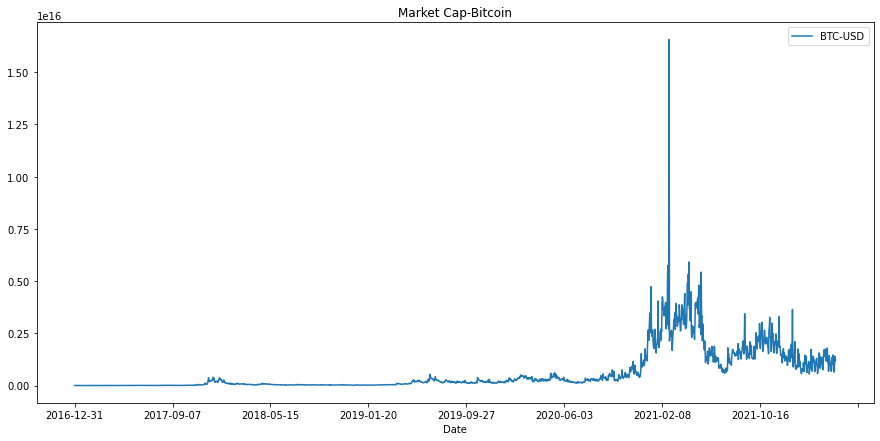

In [37]:
#Market Capitalisation bitcoin
bitcoin['MarktCap'] = bitcoin['Open'] * bitcoin['Volume']
bitcoin['MarktCap'].plot(label = 'BTC-USD', figsize = (15,7))
plt.title('Market Cap-Bitcoin')
plt.legend()

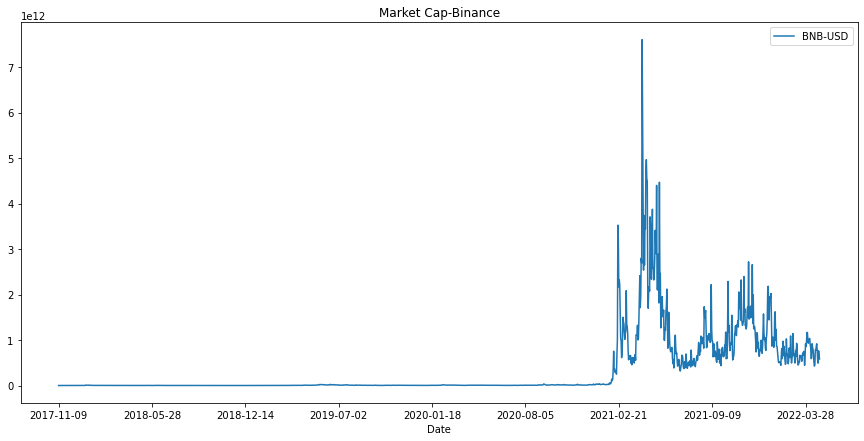

In [38]:
#Market Capitalisation
binance['MarktCap'] = binance['Open'] * binance['Volume']
binance['MarktCap'].plot(label = 'BNB-USD', figsize = (15,7))
plt.title('Market Cap-Binance')
plt.legend()

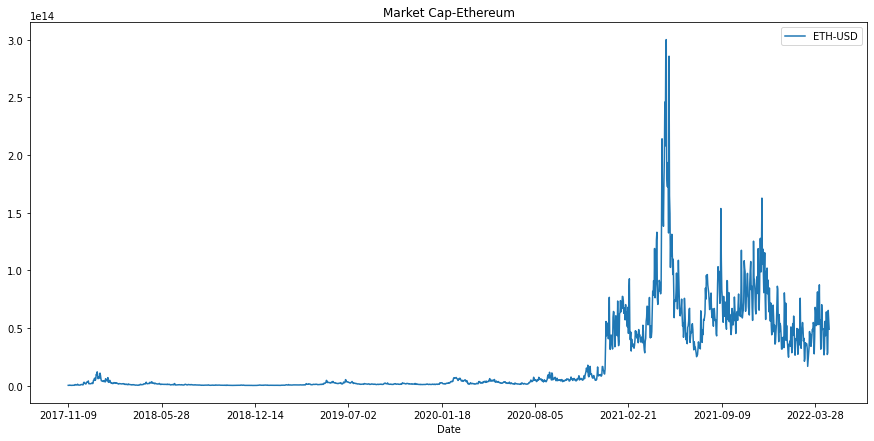

In [22]:
#Market Capitalisation Ethereum
ethereum['MarktCap'] = ethereum['Open'] * ethereum['Volume']
ethereum['MarktCap'].plot(label = 'ETH-USD', figsize = (15,7))
plt.title('Market Cap-Ethereum')
plt.legend()


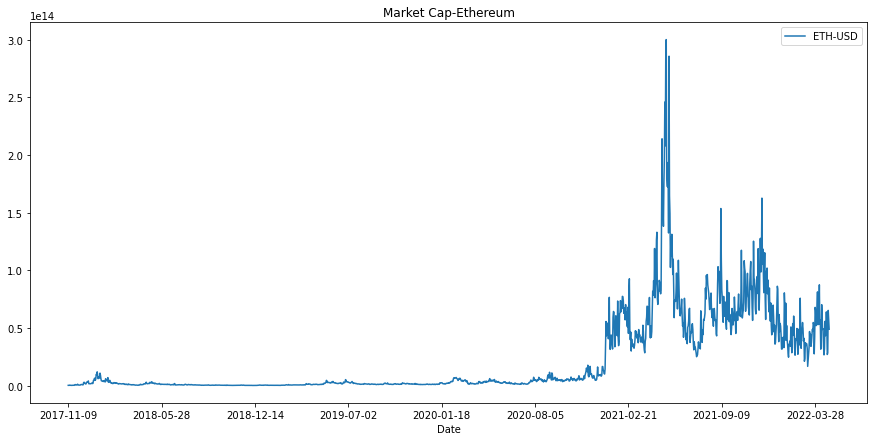

In [40]:
#Market Capitalisation Ethereum
ethereum['MarktCap'] = ethereum['Open'] * ethereum['Volume']
ethereum['MarktCap'].plot(label = 'ETH-USD', figsize = (15,7))
plt.title('Market Cap-Ethereum')
plt.legend()

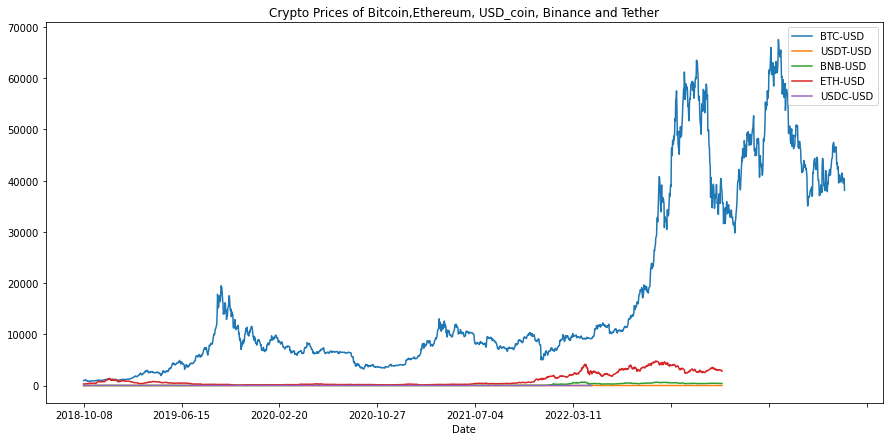

In [24]:
bitcoin['Open'].plot(label = 'BTC-USD', figsize = (15,7))
tether['Open'].plot(label = 'USDT-USD')
binance['Open'].plot(label = 'BNB-USD')
ethereum['Open'].plot(label = 'ETH-USD')
usd_coin['Open'].plot(label = 'USDC-USD')

plt.title('Crypto Prices of Bitcoin,Ethereum, USD_coin, Binance and Tether')
plt.legend()

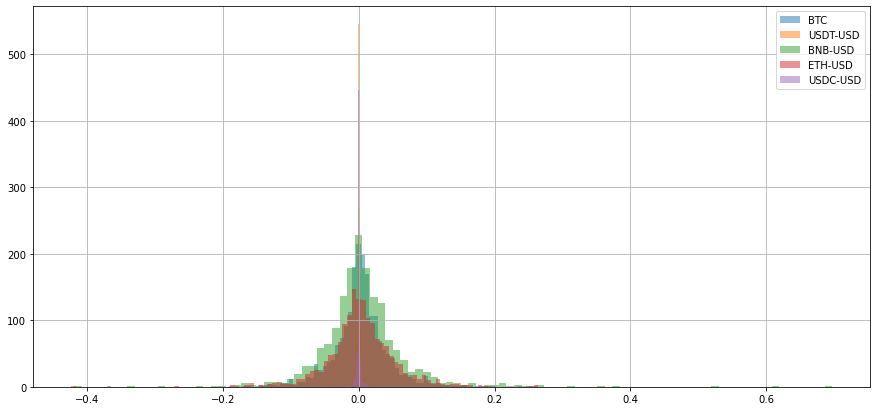

In [41]:
#Volatility 
bitcoin['returns'] = (bitcoin['Close']/bitcoin['Close'].shift(1)) -1
tether['returns'] = (tether['Close']/tether['Close'].shift(1))-1
binance['returns'] = (binance['Close']/binance['Close'].shift(1)) -1
usd_coin['returns'] = (usd_coin['Close']/usd_coin['Close'].shift(1))-1
ethereum['returns'] = (ethereum['Close']/ethereum['Close'].shift(1))-1
bitcoin['returns'].hist(bins = 100, label = 'BTC', alpha = 0.5, figsize = (15,7))
tether['returns'].hist(bins = 100, label = 'USDT-USD', alpha = 0.5)
binance['returns'].hist(bins = 100, label = 'BNB-USD', alpha = 0.5)
ethereum['returns'].hist(bins = 100, label = 'ETH-USD', alpha = 0.5)
usd_coin['returns'].hist(bins = 100, label = 'USDC-USD', alpha = 0.5)
plt.legend()

In [42]:
#Calculating SMA
bitcoin['SMA_long_BTC']=talib.SMA(bitcoin['Close'], timeperiod=100)
bitcoin['SMA_short_BTC']=talib.SMA(bitcoin['Close'], timeperiod=50)


NameError: name 'talib' is not defined

In [43]:
#Calculation of price momentum
def MOM(bitcoin, n):   
    MOM = pd.Series(bitcoin.diff(n), name='Momentum_' + str(n))   
    return MOM
bitcoin['MOM21'] = MOM(bitcoin['Close'], 21)
bitcoin['MOM63'] = MOM(bitcoin['Close'], 63)

In [44]:
#calculation of rate of change
def ROC(bitcoin, n):  
    M = bitcoin.diff(n - 1)  
    N = bitcoin.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
bitcoin['ROC21'] = ROC(bitcoin['Close'], 21)
bitcoin['ROC63'] = ROC(bitcoin['Close'], 63)

In [45]:
#calculation of exponential moving average
def EMA(bitcoin, n):
    EMA = pd.Series(bitcoin['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
bitcoin['EMA21'] = EMA(bitcoin, 21)
bitcoin['EMA63'] = EMA(bitcoin, 63)
bitcoin['EMA252'] = EMA(bitcoin, 252)

In [46]:
#calculation of relative strength index
# Calculating RSI
bitcoin['RSI_21']=talib.RSI(bitcoin['Close'], timeperiod=21)
bitcoin['RSI_63']=talib.RSI(bitcoin['Close'], timeperiod=63)
print(bitcoin.head())


NameError: name 'talib' is not defined

In [47]:
# Initialize the `signals` DataFrame with the `signal` column
bitcoin['signal'] = 0.0

# Create short simple moving average over the short window
bitcoin['short_mavg'] = bitcoin['Close'].rolling(window=50, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
bitcoin['long_mavg'] = bitcoin['Close'].rolling(window=100, min_periods=1, center=False).mean()

# Create signals
bitcoin['signal'] = np.where(bitcoin['short_mavg'] > bitcoin['long_mavg'], 1.0, 0.0) 

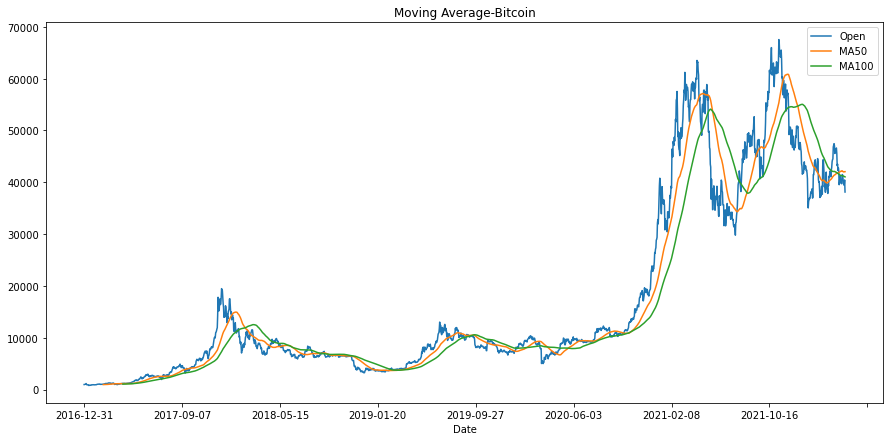

In [48]:

bitcoin['MA50']= bitcoin['Open'].rolling(50).mean()
bitcoin['MA100'] = bitcoin['Open'].rolling(100).mean()
bitcoin['Open'].plot(figsize = (15,7))
bitcoin['MA50'].plot()
bitcoin['MA100'].plot()
plt.title('Moving Average-Bitcoin')
plt.legend()
plt.show()



In [49]:
#Calculation of moving average
def MA(bitcoin, n):
    MA = pd.Series(bitcoin['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
bitcoin['MA50'] = MA(bitcoin, 50)
bitcoin['MA100'] = MA(bitcoin, 100)
bitcoin.tail()

,Open,High,Low,Close,Adj Close,Volume,MarktCap,returns,MOM21,MOM63,ROC21,ROC63,EMA21,EMA63,EMA252,signal,short_mavg,long_mavg,MA50,MA100
Date,,,,,,,,,,,,,,,,,,,,
2022-04-24,39478.375000,39845.925781,39233.539063,39469.292969,39469.292969,1.796440e+10,7.092052e+14,-0.000442,-6984.273437,1037.914063,-15.343141,6.457164,41211.744059,42006.164493,44173.026091,1.0,42016.576016,41125.033125,42016.576016,41125.033125
2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,40458.308594,3.544573e+10,1.399135e+15,0.025058,-6164.367187,3383.027344,-11.189930,5.673823,41143.249925,41957.793997,44143.660730,1.0,42057.342500,41097.842227,42057.342500,41097.842227
2022-04-26,40448.421875,40713.890625,37884.984375,38117.460938,38117.460938,3.456909e+10,1.398265e+15,-0.057858,-7438.531250,-168.566406,-11.778897,2.200982,40868.178199,41837.783588,44096.022777,1.0,42058.450938,41047.878047,42058.450938,41047.878047
2022-04-27,38120.300781,39397.917969,37997.312500,39241.121094,39241.121094,3.098102e+10,1.181006e+15,0.029479,-3965.617187,1944.550781,-9.798505,2.370075,40720.263917,41756.637886,44057.644100,1.0,42068.527969,41017.783750,42068.527969,41017.783750
2022-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40720.263917,41756.637886,44057.644100,1.0,42070.274952,41004.068103,NaN,NaN


In [50]:
#Dealing with rows that contain NAN

bitcoin.isnull().sum()
bitcoinub=bitcoin.dropna()
bitcoinub.isnull().sum()
bitcoinub.head()

,Open,High,Low,Close,Adj Close,Volume,MarktCap,returns,MOM21,MOM63,ROC21,ROC63,EMA21,EMA63,EMA252,signal,short_mavg,long_mavg,MA50,MA100
Date,,,,,,,,,,,,,,,,,,,,
2017-09-08,4605.160156,4661.000000,4075.179932,4228.750000,4228.750000,2.700890e+09,1.243803e+13,-0.080683,68.129883,1710.090088,0.835773,64.457048,4335.266647,3674.026619,2583.474203,1.0,3726.236992,3135.911199,3726.236992,3135.911199
2017-09-09,4229.810059,4308.819824,4114.109863,4226.060059,4226.060059,1.386230e+09,5.863490e+12,-0.000636,32.359864,1654.719971,3.385804,67.804679,4325.338775,3691.283268,2598.472851,1.0,3757.402993,3154.093001,3757.402993,3154.093001
2017-09-10,4229.339844,4245.439941,3951.040039,4122.939941,4122.939941,1.679090e+09,7.101442e+12,-0.024401,35.280029,1604.500000,3.028681,73.775999,4306.938881,3704.776785,2612.375897,1.0,3783.659390,3170.436899,3783.659390,3170.436899
2017-09-11,4122.470215,4261.669922,4099.399902,4161.270020,4161.270020,1.557330e+09,6.420047e+12,0.009297,159.530030,1788.709961,1.481519,78.000160,4293.696257,3719.046547,2626.484576,1.0,3812.276792,3186.896099,3812.276792,3186.896099
2017-09-12,4168.879883,4344.649902,4085.219971,4130.810059,4130.810059,1.864530e+09,7.773002e+12,-0.007320,30.290039,1793.020020,-0.498852,72.200310,4278.888421,3731.917957,2640.170811,1.0,3839.795791,3203.086099,3839.795791,3203.086099


In [51]:
   def handle_data(context, data):
        #Calculationg moving average
        MA2 = bitcoin[context.security].mavg(100),
        MA1 = bitcoin[context.security].mavg(50)
        
        #Calculating price
        date = str(bitcoin[context.security].datetime)[:10]
        current_price =bitcoin[context.security].price
        current_positions = context.portfolio.positions[symbol('AAPL')].amount
        cash = context.portfolio.cash
        value = context.portfolio.portfolio_value
        current_pnl = context.portfolio.pnl
        

In [52]:

#code (this will come under handle_data function only)
if (MA1> MA2) and current_positions==0:
    number_of_shares = int(cash/current_price)
    order(context.security, number_of_shares)
    record(date=date,MA50 = MA100, MA100 = MA100, Price= 
current_price,status="buy",shares=number_of_shares,PnL=current_pnl,cash=cash,value=value)

elif (MA1 < MA2) and current_positions != 0:
     order_target(context.security, 0)
     record(date=date,MA1 = MA1, MA2 = MA2, Price= current_price,status="sell",shares="--",PnL=current_pnl,cash=cash,value=value)

else:
    record(date=date,MA1 = MA1, MA2 = MA2, Price= current_price,status="--",shares="--",PnL=current_pnl,cash=cash,value=value)
        



NameError: name 'MA1' is not defined

In [53]:
# This ensures that our graphs will be shown properly in the notebook.
%matplotlib inline

# Import Zipline functions that we need
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

# Import date and time zone libraries
from datetime import datetime
import pytz

# Import visualization
import matplotlib.pyplot as plt


def initialize(context):
    # Which stock to trade
    context.stock = symbol('AAPL')
    
    # Moving average window
    context.index_average_window = 100
    
def handle_data(context, data):
    # Request history for the stock
    equities_hist = data.history(context.stock, "close", 
                                 context.index_average_window, "1d")
    
    # Check if price is above moving average
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
    
    # Place order
    order_target_percent(context.stock, stock_weight)

def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))
    
    # First chart
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.semilogy(perf['portfolio_value'], linestyle='-', 
                label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], 
            label='Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-.', linewidth=1.0)
    ax.legend()
    ax.grid(True)

# Set start and end date
start_date = datetime(2000, 1, 1, tzinfo=pytz.UTC)
end_date = datetime(2022, 1, 1, tzinfo=pytz.UTC)
 

ModuleNotFoundError: No module named 'zipline'

NameError: name 'upper' is not defined

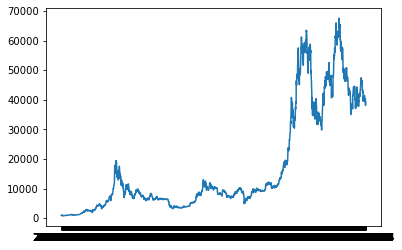

In [54]:
#let's plot the Bollinger Bands
plt.plot(bitcoin['Close'], label='price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Midle band')
plt.plot(lower, label='Lower band')
figsize=(100,7)
plt.title('Bollinger Band-bitcoin Stock')
plt.legend()
plt.show()

In [ ]:

#let's plot the Bollinger Bands
plt.plot(bitcoin['Close'], label='price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Midle band')
plt.plot(lower, label='Lower band')
figsize=(100,7)
plt.title('Bollinger Band-Bitcoin Stock')
plt.legend()
plt.show()

In [ ]:
data = pd.concat([bitcoin['Open'],tether['Open'], binance['Open'], ethereum['Open'], usd_coin['Open']],axis = 1)
data.columns = ['bitcoinOpen','tetherOpen', 'binanceOpen','usd_coinOpen','ethereumOpen' ]
scatter_matrix(data, figsize = (10,10), hist_kwds= {'bins':250})

In [ ]:
#Conclusion
#The above analysis can be used to understand a stock’s short-term and long-term behaviour. A decision support system can be created which stock to pick from industry for low-risk low gain or high-risk high gain depending on the risk apatite of the investor.

## Applying different ML/DL

# Macro Indicators       

In [10]:
df_euro_r = load_csv("macros/euro exchnage rate data.csv")
df_fed_r = load_csv("macros/Fed_interest_rate.csv", date_col="DATE")
df_gold = load_csv("macros/gold price.csv")
df_sp500 = load_csv("macros/S&p_500_index.csv")
df_sp500.head()

,Open,High,Low,Close
Date,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83
2017-01-04,2261.60,2272.82,2261.60,2270.75
2017-01-05,2268.18,2271.50,2260.45,2269.00
2017-01-06,2271.14,2282.10,2264.06,2276.98
2017-01-09,2273.59,2275.49,2268.90,2268.90


# 2. Feature Engineering

In [11]:
# these are lags we use to calculate return (10 lags that capture short and long term past returns)
lags = {
    "5d":5,
    "2w":14,
    "3w":21,
    "1m":30,
    "2m":30*2,
    "3m":30*3,
    "6m":30*6,
    "9m":30*9,
    "1y":30*12,
    "2y":30*12*2
}

In [12]:
def calculate_returns(df_returns, df_stock, stock_label):
    for lag_label, lag in lags.items(): 
        df_returns[f"return_{stock_label}_{lag_label}"] = df_stock["Adj Close"].pct_change(lag).add(1).pow(1/lag).sub(1).dropna()

In [13]:
df_returns=pd.DataFrame()
calculate_returns(df_returns, df_bnb, "bnb")
calculate_returns(df_returns, df_btc, "btc")
calculate_returns(df_returns, df_eth, "eth")
calculate_returns(df_returns, df_usdc, "usdc")
calculate_returns(df_returns, df_usdt, "usdt")
df_returns = df_returns.dropna()

In [14]:
df_returns.head()

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,...,return_usdt_5d,return_usdt_2w,return_usdt_3w,return_usdt_1m,return_usdt_2m,return_usdt_3m,return_usdt_6m,return_usdt_9m,return_usdt_1y,return_usdt_2y
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-27,0.016838,-0.012080,0.005825,0.004156,0.004598,0.005845,0.004083,0.002407,0.001419,0.001270,...,0.000008,0.000162,-0.000064,-0.000018,-0.000018,-0.000006,-8.541802e-06,0.000006,-0.000010,0.000008
2020-09-28,0.033721,-0.010279,0.008912,0.005317,0.004991,0.006240,0.004177,0.002700,0.001495,0.001327,...,0.000040,-0.000012,0.000028,-0.000057,-0.000012,0.000014,-2.007980e-05,-0.000002,-0.000021,0.000006
2020-09-29,0.032220,0.004192,0.010442,0.006646,0.005570,0.006689,0.004409,0.002772,0.001687,0.001427,...,-0.000083,-0.000116,-0.000008,-0.000011,0.000012,-0.000008,7.605140e-07,-0.000012,-0.000003,0.000010
2020-09-30,0.034989,0.003315,0.008482,0.007811,0.005143,0.007069,0.004365,0.002767,0.001797,0.001594,...,-0.000021,-0.000148,-0.000035,-0.000061,0.000073,-0.000158,-1.930363e-06,-0.000023,-0.000030,0.000012
2020-10-01,0.009069,0.001153,0.005280,0.003338,0.004507,0.006514,0.003814,0.002465,0.001475,0.001470,...,-0.000226,-0.000084,-0.000036,-0.000108,0.000048,0.000013,-1.892098e-05,-0.000020,-0.000022,0.000009


In [15]:
df_returns.describe()

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,...,return_usdt_5d,return_usdt_2w,return_usdt_3w,return_usdt_1m,return_usdt_2m,return_usdt_3m,return_usdt_6m,return_usdt_9m,return_usdt_1y,return_usdt_2y
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02,5.780000e+02,578.000000,5.780000e+02,5.780000e+02
mean,0.005238,0.004929,0.004941,0.005009,0.005002,0.005145,0.005604,0.005599,0.005530,0.003722,...,-0.000002,-0.000002,-0.000002,-0.000003,-0.000003,-2.120989e-06,-2.418726e-06,-0.000002,-3.556568e-06,-3.415723e-06
std,0.029024,0.019401,0.016645,0.014296,0.010802,0.009413,0.005605,0.004329,0.003356,0.001033,...,0.000201,0.000071,0.000050,0.000037,0.000025,1.861262e-05,1.213492e-05,0.000013,1.122728e-05,1.139130e-05
min,-0.123410,-0.063847,-0.040178,-0.022882,-0.014145,-0.008191,-0.001947,-0.002145,-0.001316,0.001270,...,-0.002272,-0.000811,-0.000542,-0.000389,-0.000312,-2.113551e-04,-1.043126e-04,-0.000191,-1.441026e-04,-7.184706e-05
25%,-0.007831,-0.004561,-0.003418,-0.003124,-0.000841,-0.000218,0.001317,0.001572,0.001941,0.003068,...,-0.000066,-0.000027,-0.000020,-0.000017,-0.000008,-7.095727e-06,-4.768190e-06,-0.000004,-6.076408e-06,-8.412316e-06
50%,0.003043,0.002973,0.002356,0.002505,0.002608,0.003024,0.003510,0.004121,0.007293,0.003996,...,-0.000006,-0.000001,-0.000001,-0.000002,-0.000002,-3.887310e-07,-6.579208e-07,-0.000001,-1.853356e-06,-3.427013e-06
75%,0.015222,0.011049,0.010387,0.009713,0.007082,0.005469,0.011161,0.009591,0.008311,0.004500,...,0.000050,0.000023,0.000014,0.000012,0.000005,4.329751e-06,1.895559e-06,0.000002,8.526261e-07,7.593089e-07
max,0.195113,0.120252,0.102502,0.070900,0.039647,0.031076,0.018064,0.013247,0.010477,0.005379,...,0.002308,0.000599,0.000517,0.000351,0.000184,1.227867e-04,5.895396e-05,0.000096,7.204253e-05,4.788566e-05


__Preparing macro Indicators__ 


In [16]:
df_factors = pd.DataFrame()

In [17]:
df_sp500[" Close"].pct_change(5).add(1).pow(1/5).sub(1).dropna()

Date
2017-01-10    0.000979
2017-01-11    0.000402
2017-01-12    0.000127
2017-01-13   -0.000206
2017-01-17   -0.000089
                ...   
2022-04-28   -0.004880
2022-04-29   -0.006635
2022-05-02   -0.006640
2022-05-03    0.000013
2022-05-04    0.005494
Name:  Close, Length: 1339, dtype: float64

In [18]:
df_factors["return_gold_5d"] = df_gold["Close/Last"].pct_change(5).add(1).pow(1/5).sub(1).dropna()
df_factors["euro_r"] = df_euro_r[" Close"]/100
df_factors["fed_dff"] = df_fed_r["DFF"]/100
df_factors["return_sp500_5d"] = df_sp500[" Close"].pct_change(5).add(1).pow(1/5).sub(1).dropna()
df_factors = df_factors.dropna()
df_factors.describe()

,return_gold_5d,euro_r,fed_dff,return_sp500_5d
count,1254.000000,1254.000000,1254.000000,1254.000000
mean,-0.000329,0.011542,0.010485,0.000457
std,0.004089,0.000415,0.008994,0.004991
min,-0.022821,0.010499,0.000400,-0.038835
25%,-0.002487,0.011211,0.000900,-0.001286
50%,-0.000546,0.011546,0.011600,0.000950
75%,0.001708,0.011842,0.019000,0.002947
max,0.024251,0.012507,0.024500,0.032599


__Calculate factor betas__
- The objectif is to calculate factor betas for each stock and include them as features for our machine learning model later

In [19]:
df_return_bnb = pd.DataFrame()
calculate_returns(df_returns=df_return_bnb, df_stock=df_bnb, stock_label="bnb")
df_return_bnb.head()

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y
Date,,,,,,,,,,
2017-11-14,-0.043652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-15,-0.031584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-16,-0.011335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-17,-0.001231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-18,-0.001462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

In [21]:
df_factors_bnb = df_factors.join(df_return_bnb["return_bnb_5d"]).dropna().sort_index()

In [22]:
betas_bnb = (RollingOLS(endog=df_factors_bnb.return_bnb_5d,
    exog=sm.add_constant(df_factors_bnb.drop("return_bnb_5d", axis=1)),
     window=60)
     .fit(params_only=True)
     .params
     .drop('const', axis=1))

betas_bnb = betas_bnb.fillna(betas_bnb.mean())
betas_bnb

,return_gold_5d,euro_r,fed_dff,return_sp500_5d
Date,,,,
2017-11-14,-0.471801,-14.724381,-15.052453,1.182115
2017-11-15,-0.471801,-14.724381,-15.052453,1.182115
2017-11-16,-0.471801,-14.724381,-15.052453,1.182115
2017-11-17,-0.471801,-14.724381,-15.052453,1.182115
2017-11-20,-0.471801,-14.724381,-15.052453,1.182115
...,...,...,...,...
2022-04-21,-0.365535,8.330431,0.689213,0.694077
2022-04-22,-0.372284,7.953806,0.735842,0.681546
2022-04-25,-0.363918,8.396486,0.921797,0.758655


In [23]:
betas_bnb.describe()

,return_gold_5d,euro_r,fed_dff,return_sp500_5d
count,1117.000000,1117.000000,1117.000000,1117.000000
mean,-0.471801,-14.724381,-15.052453,1.182115
std,1.454812,77.381826,66.979143,1.501438
min,-5.238175,-284.571921,-348.491220,-2.817675
25%,-1.441064,-53.514483,-28.118184,0.364514
50%,-0.570619,-2.576965,-1.281263,0.982937
75%,0.413530,42.084338,7.601323,1.667616
max,6.054736,112.799921,353.651372,5.314083


In [24]:
data_bnb = df_return_bnb.join(betas_bnb.shift()).dropna()
data_bnb

,return_bnb_5d,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,return_gold_5d,euro_r,fed_dff,return_sp500_5d
Date,,,,,,,,,,,,,,
2019-10-30,0.015325,0.008509,0.005755,0.007901,-0.000950,-0.003985,-0.000930,0.003970,0.002045,0.003216,-1.348410,74.956839,-3.092925,1.634638
2019-10-31,0.011491,0.005313,0.006185,0.007670,-0.001258,-0.003747,-0.000748,0.004038,0.002020,0.003352,-1.354066,76.435318,-3.130620,1.620261
2019-11-01,0.006892,0.006623,0.008648,0.007607,-0.002140,-0.003676,-0.000775,0.003847,0.001992,0.003456,-1.275662,70.508667,-3.263832,1.838768
2019-11-04,0.006400,0.008951,0.005558,0.009270,-0.001550,-0.003186,-0.000004,0.003662,0.002155,0.003571,-1.251164,60.101075,-3.194510,1.925173
2019-11-05,0.007142,0.009339,0.005307,0.010059,-0.001110,-0.003860,0.000533,0.003274,0.002152,0.003626,-1.216309,50.677319,-3.261286,2.032057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,-0.006040,-0.005380,-0.002726,0.000058,0.001027,0.000619,-0.001011,0.001082,-0.000771,0.004368,-0.524509,3.700246,0.536079,0.777641
2022-04-22,-0.000192,-0.002529,-0.004414,-0.000133,0.002202,0.001423,-0.000877,0.001075,-0.000928,0.004373,-0.365535,8.330431,0.689213,0.694077
2022-04-25,-0.006786,0.001838,-0.004819,-0.000940,0.001881,0.000556,-0.000582,0.000905,-0.001205,0.004418,-0.372284,7.953806,0.735842,0.681546
